In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Bandit:
    def __init__(self, arms=10):  # arms = 슬롯머신 대수
        self.rates = np.random.rand(arms)  # 슬롯머신 각각의 승률 설정(무작위)

    def play(self, arm):
        rate = self.rates[arm]
        if rate > np.random.rand():
            return 1
        else:
            return 0

In [3]:
class Agent:
    def __init__(self, epsilon, action_size=10):
        self.epsilon = epsilon  # 무작위로 행동할 확률(탐색 확률)
        self.Qs = np.zeros(action_size)
        self.ns = np.zeros(action_size)

    # 슬롯머신의 가치 추정
    def update(self, action, reward):
        self.ns[action] += 1
        self.Qs[action] += (reward - self.Qs[action]) / self.ns[action]

    # 행동 선택(ε-탐욕 정책)
    def get_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, len(self.Qs))  # 무작위 행동 선택
        return np.argmax(self.Qs)  # 탐욕 행동 선택

858


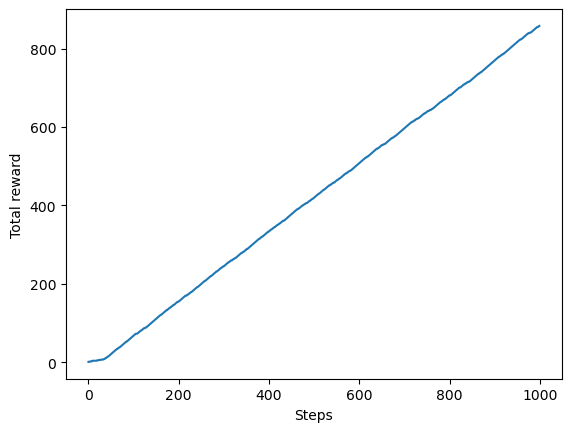

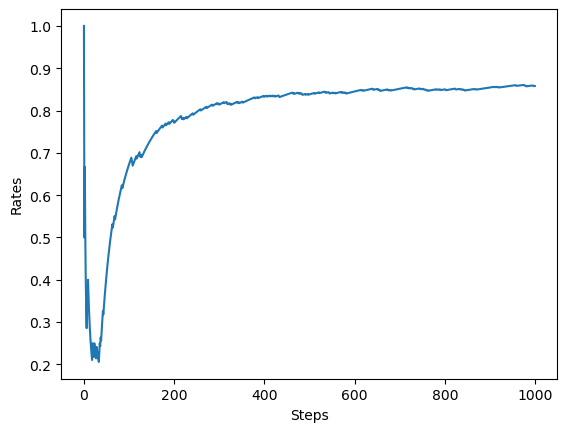

In [5]:
if __name__ == '__main__':
    steps = 1000
    epsilon = 0.1

    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    total_rewards = []  # 보상 합
    rates = []          # 승률

    for step in range(steps):
        action = agent.get_action()   # 행동 선택
        reward = bandit.play(action)  # 실제로 플레이하고 보상을 받음
        agent.update(action, reward)  # 행동과 보상을 통해 학습
        total_reward += reward

        total_rewards.append(total_reward)       # 현재까지의 보상 합 저장
        rates.append(total_reward / (step + 1))  # 현재까지의 승률 저장

    print(total_reward)

    # [그림 1-12] 단계별 보상 총합
    plt.ylabel('Total reward')
    plt.xlabel('Steps')
    plt.plot(total_rewards)
    plt.show()

    # [그림 1-13] 단계별 승률
    plt.ylabel('Rates')
    plt.xlabel('Steps')
    plt.plot(rates)
    plt.show()

초반에 승률이 잘나오다 다른 곳으로 이동 다시 0.6 정도 나오다 점점 0.8로 saturation -> epsilon greedy policy 잘 이루어짐

얘는 1000번 했을 때 최종 성능